In [ ]:
import librosa
audio_path = '/content/drive/MyDrive/Colab Notebooks/RNN/audio /practice/MoodyLoop.wav'
x ,sr = librosa.load(audio_path)

In [ ]:
x[870]

0.0030060248

In [ ]:
x.shape

(993757,)

In [ ]:

sr

22050

In [ ]:
import IPython.display as ipd
ipd.Audio('/content/drive/MyDrive/Colab Notebooks/RNN/audio /practice/MoodyLoop.wav')

Output hidden; open in https://colab.research.google.com to view.

#visualization audio in a wave

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

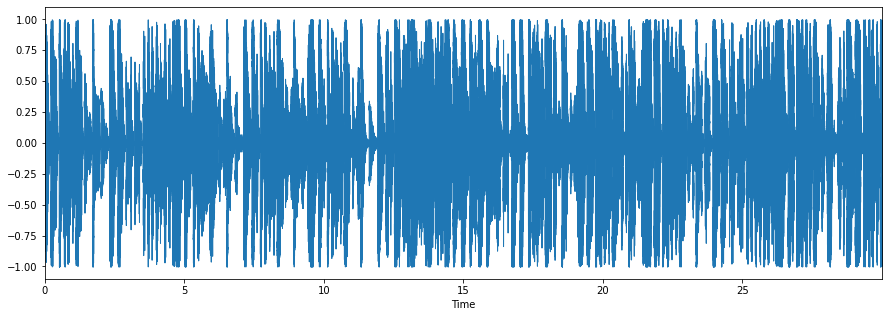

In [ ]:
audio_path = '/content/drive/MyDrive/Colab Notebooks/RNN/audio /practice/hiphop.00006.au'
plt.figure(figsize=(15,5))
x,sr = librosa.load(audio_path)
librosa.display.waveplot(x,sr)

#spectrogram

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "


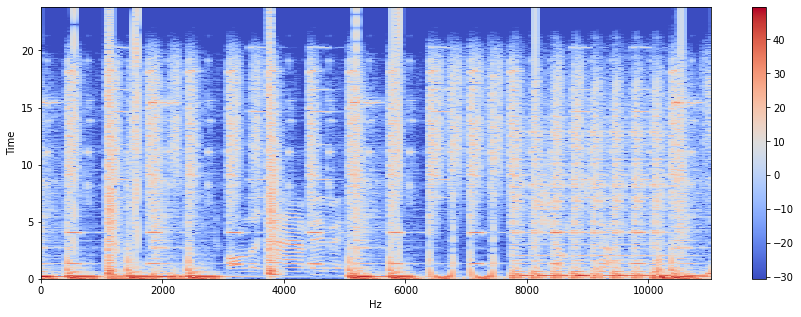

In [ ]:
audio_path = '/content/drive/MyDrive/Colab Notebooks/RNN/audio /practice/hiphop.00006.au'
plt.figure(figsize=(15,5))
x,sr = librosa.load(audio_path, duration= 5)
X = librosa.stft(x)
db = librosa.amplitude_to_db(X)

librosa.display.specshow(db, x_axis='hz', y_axis='time')
plt.colorbar()
plt.show()

#zero crossing rate

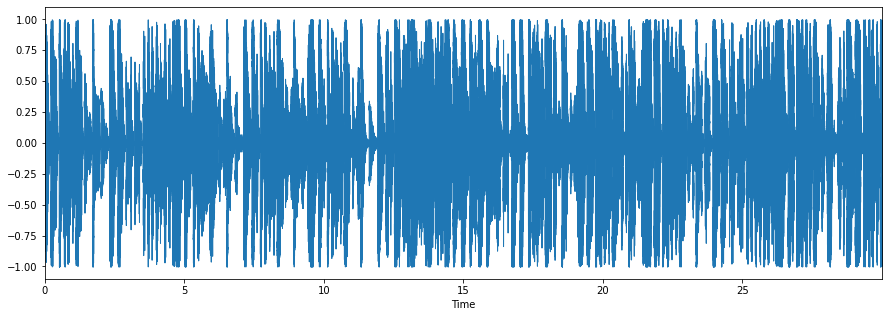

In [ ]:
audio_path = '/content/drive/MyDrive/Colab Notebooks/RNN/audio /practice/hiphop.00006.au'
plt.figure(figsize=(15,5))
x,sr = librosa.load(audio_path)
librosa.display.waveplot(x,sr)

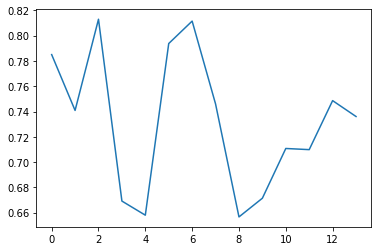

In [ ]:
n1 = 1
n2 = 15
plt.plot(x[n1:n2])


In [ ]:
a = librosa.zero_crossings(x[n1:n2], pad = False)
sum(a)

0

#spectral centroid


it is saying where is center of mass in 1 second

In [ ]:
len(x)

661504

In [ ]:
import sklearn.preprocessing
spectral_centroid = librosa.feature.spectral_centroid(x,sr)[0]
len(spectral_centroid)

1293

In [ ]:
spectral_centroid

array([1890.159014  , 1735.90387572, 1627.49052058, ..., 3484.98495653,
       2506.53183153, 1797.73296129])

In [ ]:
frames = range(len(spectral_centroid))

In [ ]:
t = librosa.frames_to_time(frames)
len(t)

1293

In [ ]:
def normalize(x, axis = 0):
  return sklearn.preprocessing.minmax_scale(x, axis=axis)


<Figure size 360x360 with 0 Axes>

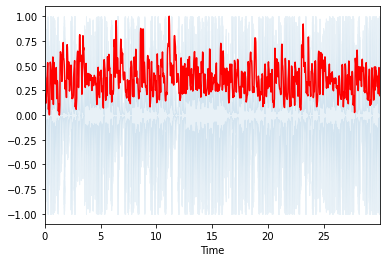

<Figure size 360x360 with 0 Axes>

In [ ]:
librosa.display.waveplot(x,sr, alpha = 0.1)
plt.plot(t,normalize(spectral_centroid) ,color = 'r')
plt.figure(figsize=(5,5))

#chroma frequency

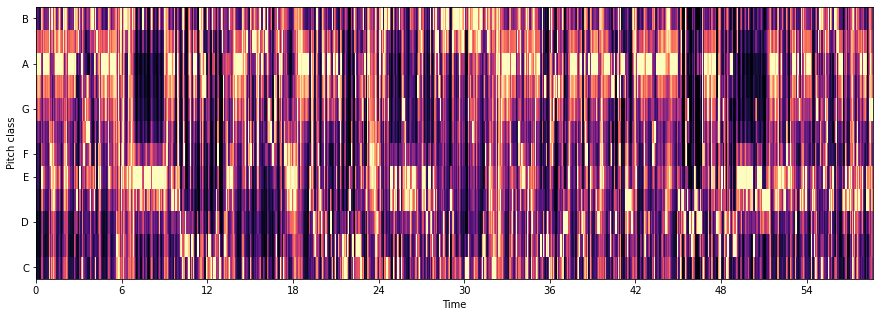

In [ ]:
audio_path = '/content/drive/MyDrive/Colab Notebooks/RNN/audio /practice/hiphop.00006.au'
plt.figure(figsize=(15,5))
x,sr = librosa.load(audio_path)

chroma_gram  = librosa.feature.chroma_stft(x,sr)
librosa.display.specshow(chroma_gram,x_axis='time', y_axis='chroma',hop_length=1000)

#spectrall rool off

In [ ]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01,sr)[0]

In [ ]:
len(spectral_rolloff)

1293

In [ ]:
def normalize(x, axis = 0):
  return sklearn.preprocessing.minmax_scale(x, axis=axis)

In [ ]:
frames = range(len(spectral_rolloff))
t = librosa.frames_to_time(frames)
len(t)

1293

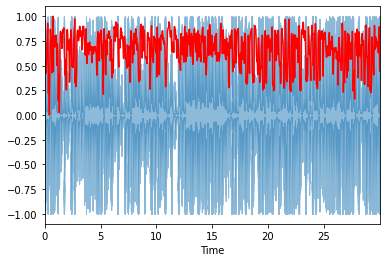

In [ ]:
librosa.display.waveplot(x,sr, alpha = 0.5)
plt.plot(t ,normalize(spectral_rolloff), color = 'r')


#MEL FREQUENCT CEPSTRUM

In [ ]:
x,sr = librosa.load('/content/drive/MyDrive/Colab Notebooks/RNN/audio /practice/disco.00018.au')

In [ ]:
mfcc =librosa.feature.mfcc(x,sr)

In [ ]:
mfcc.shape

(20, 1293)

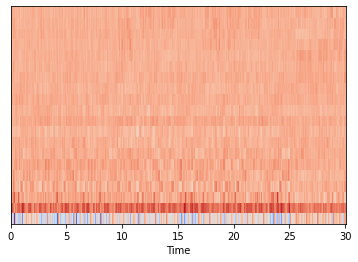

In [ ]:
librosa.display.specshow(mfcc, sr=sr, x_axis='time')

importing libraries

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import os
import pathlib


#extracting soectrogram for every audio



In [ ]:
cmap = plt.get_cmap('inferno')
musics = ['classical','jazz','metal','pop','rock']
for i in musics:
  pathlib.Path(f'/content/drive/MyDrive/Colab Notebooks/RNN/audio /images of audio/{i}').mkdir(parents = True, exist_ok = True)
  for filename in os.listdir(f'/content/drive/MyDrive/Colab Notebooks/RNN/audio /class/{i}'):
    songname = f'/content/drive/MyDrive/Colab Notebooks/RNN/audio /class/{i}/{filename}'
    y, sr = librosa.load(songname, mono = True, duration = 5)
    plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
    plt.axis('off')
    plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/RNN/audio /images of audio/{i}/{filename[:-3].replace(".","")}.png')
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [54]:
mfcc = librosa.feature.mfcc(y,sr)

In [60]:
mfcc[19]

array([-0.6027548 , -3.166621  , -2.3133307 , ...,  0.15120338,
        1.7960434 , -0.51141   ], dtype=float32)

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

img = load_img('/content/drive/MyDrive/Colab Notebooks/RNN/audio /images of audio/classical/classical00005.png')

img_array = img_to_array(img)    

print("type:",img_array.dtype)
print("shape:",img_array.shape)

img_pil = array_to_img(img_array)
print("converting NumPy array:",type(img_pil))

type: float32
shape: (288, 432, 3)
converting NumPy array: <class 'PIL.Image.Image'>


#creating csv file

In [84]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'

for i in range(1,21):
  header = header + f' mfcc{i}'

header

'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate mfcc1 mfcc2 mfcc3 mfcc4 mfcc5 mfcc6 mfcc7 mfcc8 mfcc9 mfcc10 mfcc11 mfcc12 mfcc13 mfcc14 mfcc15 mfcc16 mfcc17 mfcc18 mfcc19 mfcc20'

In [85]:
header = header + ' label'

In [86]:
header

'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate mfcc1 mfcc2 mfcc3 mfcc4 mfcc5 mfcc6 mfcc7 mfcc8 mfcc9 mfcc10 mfcc11 mfcc12 mfcc13 mfcc14 mfcc15 mfcc16 mfcc17 mfcc18 mfcc19 mfcc20 label'

In [87]:
header = header.split()

In [88]:
import csv
import os
import librosa
import numpy as np
file = open('/content/drive/MyDrive/Colab Notebooks/RNN/audio/audio.csv','w',newline='')
with file:
  writer = csv.writer(file)
  writer.writerow(header)

music = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for i in music:
  for filename in os.listdir(f'/content/drive/MyDrive/Colab Notebooks/RNN/audio/class - 2/{i}'):
    songname = f'/content/drive/MyDrive/Colab Notebooks/RNN/audio/class - 2/{i}/{filename}'
    y, sr = librosa.load(songname, mono = True)
    chroma_stft = librosa.feature.chroma_stft(y,sr)
    rmse = librosa.feature.rms(y,sr)
    spectral_centroid = librosa.feature.spectral_centroid(y,sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y,sr)
    rolloff = librosa.feature.spectral_rolloff(y,sr)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y,sr)
    mfcc = librosa.feature.mfcc(y,sr)
    to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spectral_centroid)} {np.mean(spectral_bandwidth)} {np.mean(rolloff)} {np.mean(zero_crossing_rate)}'
    for e in mfcc:
      to_append = to_append + f' {np.mean(e)}'
    to_append = to_append + f' {i}'
    file = open('/content/drive/MyDrive/Colab Notebooks/RNN/audio/audio.csv','a', newline='')
    with file:
      writer = csv.writer(file)
      writer.writerow(to_append.split())



In [89]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RNN/audio/audio.csv')

In [90]:
data

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00002.au,0.363637,0.175570,1552.811865,1747.702312,3042.260232,0.075775,-90.722595,140.446304,-29.093889,31.684334,-13.984502,25.764742,-13.664875,11.639933,-11.783643,9.718760,-13.133803,5.791199,-8.907628,-1.077000,-9.229274,2.451689,-7.729093,-1.816407,-3.439720,-2.231259,blues
1,blues.00004.au,0.308526,0.091529,1835.004265,1748.172116,3579.757627,0.100931,-160.337708,126.219635,-35.587811,22.148071,-32.478603,10.852294,-23.352331,0.498434,-11.793437,1.207255,-13.088418,-2.813867,-6.933384,-7.552725,-9.164667,-4.520576,-5.454034,-0.916874,-4.404827,-11.703234,blues
2,blues.00003.au,0.404785,0.141093,1070.106615,1596.412872,2184.745799,0.033182,-199.544189,150.090912,5.662678,26.859079,1.771399,14.234031,-4.832006,9.286495,-0.759186,8.137607,-3.200653,6.079319,-2.480174,-1.079305,-2.870789,0.780873,-3.319597,0.636965,-0.619121,-3.407449,blues
3,blues.00005.au,0.302456,0.103494,1831.993940,1729.653287,3481.517592,0.093499,-177.774246,118.205482,-17.565880,30.762402,-21.747839,11.920995,-20.730995,3.186578,-8.586039,-0.932852,-11.772434,-2.405832,-9.343665,-9.936210,-3.903995,-5.576590,-1.838263,-2.783800,-3.047909,-8.109991,blues
4,blues.00001.au,0.340914,0.095948,1530.176679,2039.036516,3550.522098,0.055741,-207.501694,123.991264,8.955127,35.877651,2.907320,21.510466,-8.560436,23.370686,-10.099662,11.900497,-5.555639,5.376328,-2.231760,4.220140,-6.012148,0.927997,-0.731125,0.295073,-0.283518,0.531216,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00098.au,0.362485,0.083860,1398.699343,1818.450280,3015.631004,0.048535,-225.007751,123.646767,-9.724174,56.605164,10.436499,20.622280,-10.253696,15.561657,-8.227290,12.800150,-9.001976,7.682844,-10.070732,-0.256386,-5.275369,-2.812177,-4.416050,1.556207,-5.041897,-3.590644,rock
996,rock.00097.au,0.432142,0.081651,2077.526598,1927.293153,4031.405321,0.121122,-124.952271,115.177155,-47.975151,52.814674,-13.484810,21.742352,-12.407492,20.122042,-18.363756,10.120382,-16.037611,10.474113,-17.947060,1.212127,-11.519417,1.838089,-12.845291,3.440978,-12.588070,-2.106337,rock
997,rock.00099.au,0.358401,0.054454,1609.795082,1797.213044,3246.908930,0.075690,-235.161972,123.870094,-22.538395,52.939747,-1.444669,24.641056,-7.073817,14.880081,-12.769979,16.712585,-2.936966,10.076435,-15.024692,3.116931,-7.123282,1.794104,-7.069775,0.028346,-2.025782,1.155238,rock
998,rock.00094.au,0.389313,0.101960,2628.863788,2210.478936,5085.874454,0.145756,-90.209846,80.066101,-46.360237,56.053726,-8.083482,27.479971,-17.327835,22.960869,-17.593615,18.408651,-17.429619,7.658797,-19.291197,1.189899,-14.477116,4.514653,-12.762190,2.999796,-6.408553,2.254876,rock


#encoding dependent vriable

In [92]:
x = data.drop(['label'], axis = 1)

In [93]:
y = data['label']

In [94]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [95]:
y = encoder.fit_transform(y)

In [96]:
from keras.utils import np_utils
y = np_utils.to_categorical(y)

In [97]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

#scaling independent variable

In [99]:
x = x.drop(['filename'], axis = 1)

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

#doing train test split

In [101]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 2)

In [102]:
print(x_train.shape) 
print(x_test.shape)  
print(y_train.shape)
print(y_test.shape)

(700, 26)
(300, 26)
(700, 10)
(300, 10)


#creating model

In [103]:
from keras.layers import Dense, Input, LSTM, Dropout
from keras.layers import Bidirectional
from keras.models import Model, Sequential


In [104]:
x_train.shape

(700, 26)

In [110]:
x_rnn_train  = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])
x_rnn_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])

In [107]:
x_rnn_train.shape[2]

26

In [113]:
model = Sequential()
model.add(Bidirectional(LSTM(32, activation='relu', input_shape = (1,1,26))))
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(10, activation='softmax'))


model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(x_rnn_train,y_train, batch_size = 100, epochs = 400, validation_split = 0.2)





Epoch 1/400
6/6 [==============================] - 3s 88ms/step - loss: 2.2932 - accuracy: 0.0860 - val_loss: 2.2621 - val_accuracy: 0.1286
Epoch 2/400
6/6 [==============================] - 0s 13ms/step - loss: 2.2342 - accuracy: 0.1705 - val_loss: 2.2135 - val_accuracy: 0.2000
Epoch 3/400
6/6 [==============================] - 0s 12ms/step - loss: 2.2012 - accuracy: 0.2191 - val_loss: 2.1663 - val_accuracy: 0.2357
Epoch 4/400
6/6 [==============================] - 0s 12ms/step - loss: 2.1556 - accuracy: 0.2783 - val_loss: 2.1200 - val_accuracy: 0.2714
Epoch 5/400
6/6 [==============================] - 0s 12ms/step - loss: 2.1133 - accuracy: 0.2926 - val_loss: 2.0763 - val_accuracy: 0.2714
Epoch 6/400
6/6 [==============================] - 0s 13ms/step - loss: 2.0636 - accuracy: 0.3152 - val_loss: 2.0354 - val_accuracy: 0.3071
Epoch 7/400
6/6 [==============================] - 0s 12ms/step - loss: 2.0105 - accuracy: 0.3423 - val_loss: 1.9928 - val_accuracy: 0.3143
Epoch 8/400
6/6 [===

In [114]:
print(model.evaluate(x_rnn_train, y_train))

22/22 [==============================] - 0s 2ms/step - loss: 0.5493 - accuracy: 0.9200
[0.5493432879447937, 0.9200000166893005]


In [115]:
print(model.evaluate(x_rnn_test, y_test))

10/10 [==============================] - 0s 2ms/step - loss: 1.7585 - accuracy: 0.6700
[1.7585397958755493, 0.6700000166893005]


In [117]:
train_preds = model.predict_classes(x_rnn_train)
train_preds

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 3, 1, 9, 1, 1, 7, 8, 8, 4, 7, 7, 3, 5, 0, 0, 5, 8, 6, 0, 8, 8,
       6, 4, 1, 7, 9, 1, 9, 9, 3, 3, 7, 3, 7, 5, 0, 3, 6, 7, 4, 7, 4, 2,
       6, 8, 5, 8, 5, 7, 4, 3, 0, 7, 8, 3, 2, 4, 0, 6, 9, 8, 7, 1, 1, 4,
       0, 4, 4, 0, 4, 7, 4, 6, 8, 4, 8, 8, 6, 6, 5, 4, 0, 9, 4, 6, 7, 4,
       4, 2, 3, 0, 5, 9, 9, 1, 5, 8, 3, 3, 5, 3, 8, 5, 6, 0, 6, 7, 1, 6,
       6, 3, 8, 0, 3, 2, 3, 9, 5, 1, 0, 2, 0, 2, 9, 4, 2, 9, 3, 2, 7, 1,
       9, 5, 4, 3, 5, 2, 2, 1, 7, 7, 6, 5, 8, 8, 7, 1, 9, 1, 1, 7, 2, 7,
       1, 8, 9, 7, 5, 6, 9, 4, 5, 2, 1, 1, 3, 1, 9, 9, 0, 3, 6, 1, 9, 8,
       3, 2, 4, 8, 2, 3, 1, 3, 9, 7, 7, 4, 5, 0, 4, 2, 5, 4, 0, 1, 1, 5,
       6, 6, 2, 0, 9, 8, 7, 3, 6, 0, 5, 6, 5, 0, 3, 7, 8, 9, 2, 9, 4, 6,
       0, 9, 2, 1, 2, 3, 1, 1, 1, 5, 5, 3, 2, 8, 6, 1, 9, 1, 9, 0, 8, 4,
       1, 0, 2, 3, 0, 2, 1, 1, 0, 7, 6, 4, 8, 3, 6, 2, 9, 0, 5, 9, 1, 1,
       5, 0, 4, 6, 9, 0, 0, 9, 6, 3, 0, 4, 7, 0, 4, 2, 7, 5, 5, 8, 5, 6,
       1, 6, 3, 8, 2, 3, 6, 4, 4, 6, 6, 5, 9, 3, 7,

In [118]:
test_preds = model.predict_classes(x_rnn_test)
test_preds

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 7, 7, 2, 9, 6, 6, 2, 3, 2, 1, 3, 5, 7, 2, 6, 7, 4, 9, 0, 7, 0,
       3, 9, 1, 6, 3, 5, 0, 4, 6, 9, 5, 2, 4, 1, 0, 4, 5, 6, 2, 4, 8, 5,
       5, 3, 5, 4, 7, 0, 5, 7, 4, 3, 8, 3, 2, 5, 5, 4, 1, 3, 1, 5, 1, 9,
       6, 2, 3, 3, 9, 5, 2, 0, 8, 1, 2, 9, 2, 6, 7, 5, 8, 4, 7, 0, 9, 5,
       5, 0, 1, 2, 8, 7, 3, 1, 7, 8, 9, 5, 6, 2, 9, 3, 5, 4, 4, 4, 5, 5,
       7, 6, 0, 9, 9, 1, 6, 3, 6, 8, 6, 2, 9, 6, 8, 2, 8, 3, 2, 8, 0, 8,
       6, 8, 6, 2, 1, 4, 3, 7, 4, 5, 9, 3, 3, 4, 4, 3, 9, 4, 6, 7, 4, 5,
       4, 3, 2, 0, 2, 3, 3, 3, 4, 6, 2, 2, 1, 9, 9, 3, 2, 3, 5, 8, 4, 3,
       1, 1, 1, 3, 0, 3, 4, 9, 5, 1, 8, 7, 7, 1, 4, 4, 5, 0, 3, 8, 8, 3,
       6, 8, 1, 8, 8, 3, 2, 5, 3, 5, 5, 4, 0, 3, 3, 1, 8, 2, 8, 8, 3, 9,
       3, 4, 2, 5, 9, 3, 2, 2, 9, 3, 7, 7, 3, 6, 8, 0, 9, 7, 0, 1, 2, 4,
       7, 6, 5, 8, 9, 2, 5, 4, 3, 1, 8, 4, 4, 8, 8, 6, 4, 0, 0, 0, 7, 0,
       0, 8, 5, 7, 1, 3, 7, 2, 3, 4, 5, 8, 1, 1, 2, 6, 1, 7, 2, 5, 0, 1,
       1, 2, 2, 0, 2, 9, 3, 3, 9, 8, 5, 5, 6, 1])

In [119]:
target_name = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [121]:
pd.DataFrame(classification_report(y_pred=test_preds,
                      y_true=y_test.argmax(axis=1),
                      target_names = target_name,
                     output_dict = True
                     ))

,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock,accuracy,macro avg,weighted avg
precision,0.583333,0.964286,0.628571,0.511628,0.625000,0.600000,0.916667,0.833333,0.733333,0.440000,0.67,0.683615,0.687208
recall,0.583333,0.843750,0.647059,0.733333,0.689655,0.724138,0.733333,0.769231,0.594595,0.379310,0.67,0.669774,0.670000
f1-score,0.583333,0.900000,0.637681,0.602740,0.655738,0.656250,0.814815,0.800000,0.656716,0.407407,0.67,0.671468,0.673229
support,24.000000,32.000000,34.000000,30.000000,29.000000,29.000000,30.000000,26.000000,37.000000,29.000000,0.67,300.000000,300.000000


In [122]:
cm = confusion_matrix(y_test.argmax(axis=1), test_preds)
cm

array([[14,  0,  3,  2,  0,  2,  0,  0,  0,  3],
       [ 1, 27,  0,  0,  0,  4,  0,  0,  0,  0],
       [ 0,  0, 22,  1,  0,  5,  0,  1,  2,  3],
       [ 1,  0,  0, 22,  3,  1,  1,  0,  0,  2],
       [ 0,  0,  1,  4, 20,  1,  1,  0,  1,  1],
       [ 1,  1,  3,  2,  0, 21,  0,  0,  0,  1],
       [ 1,  0,  1,  1,  2,  0, 22,  0,  2,  1],
       [ 0,  0,  2,  1,  0,  1,  0, 20,  2,  0],
       [ 2,  0,  2,  1,  6,  0,  0,  1, 22,  3],
       [ 4,  0,  1,  9,  1,  0,  0,  2,  1, 11]])

In [124]:
cm_df = pd.DataFrame(cm,
                     index = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock'], 
                     columns = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock'])
cm_df

,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
blues,14,0,3,2,0,2,0,0,0,3
classical,1,27,0,0,0,4,0,0,0,0
country,0,0,22,1,0,5,0,1,2,3
disco,1,0,0,22,3,1,1,0,0,2
hiphop,0,0,1,4,20,1,1,0,1,1
jazz,1,1,3,2,0,21,0,0,0,1
metal,1,0,1,1,2,0,22,0,2,1
pop,0,0,2,1,0,1,0,20,2,0
reggae,2,0,2,1,6,0,0,1,22,3
rock,4,0,1,9,1,0,0,2,1,11


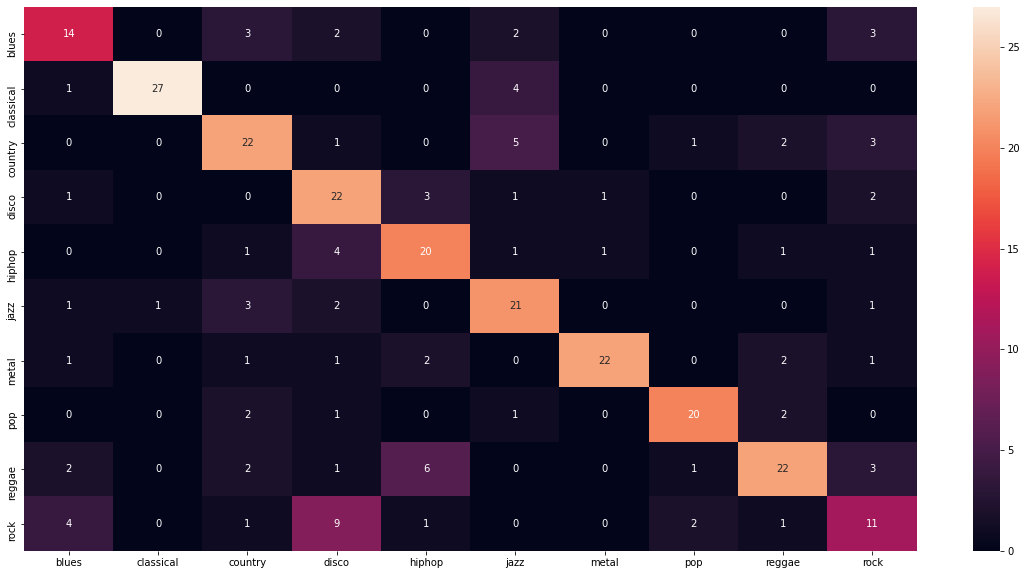

In [132]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(cm_df, annot=True)

In [ ]:
target_name = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
